In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [3]:
import matplotlib.colors as mcolors
color_list = ['#672044', '#8B3058', '#AD466C', '#CC607D', '#E38191', '#F4A3A8', '#FFC6C4']
jacobs_colors = [mcolors.to_rgb(x) for x in color_list]
jacobs_two = [mcolors.to_rgb('#8B3058'), mcolors.to_rgb('#F4A3A8')]

In [4]:
cleaned_jacobs = jacobs.loc[jacobs['ppsk'] != 'MISSING']
cleaned_jacobs['ppsk'] = cleaned_jacobs.loc[:, 'ppsk'].astype(int)
ethnicities = cleaned_jacobs.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk').drop_duplicates(subset='ppsk').rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
ethnicities

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male
2,895798,2015,Fall,N,N,Y,White/Other,Male
7,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female
8,856881,2015,Fall,N,Y,Y,International,Male
9,946962,2015,Fall,N,Y,Y,White/Other,Male
...,...,...,...,...,...,...,...,...
9018,2734942,2020,Fall,N,N,Y,White/Other,Female
9019,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female
9020,2738497,2020,Fall,N,Y,N,International,Male
9021,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male


In [5]:
demographics = student_courses[['ppsk']].merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='inner').drop_duplicates().rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
urms = demographics[demographics['Ethnicity'] == 'Underrepresented Minority']
urms

,ppsk,Ethnicity,Gender
1630,787652,Underrepresented Minority,Male
1735,791882,Underrepresented Minority,Female
2169,813809,Underrepresented Minority,Male
2811,609891,Underrepresented Minority,Male
2997,656505,Underrepresented Minority,Female
...,...,...,...
3761375,2768138,Underrepresented Minority,Female
3761396,2769675,Underrepresented Minority,Male
3761586,1487118,Underrepresented Minority,Female
3761774,2428229,Underrepresented Minority,Male


In [6]:
test = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[demographics.groupby('Ethnicity').count().loc[[True,True,False,True]].sum(),
demographics.groupby('Ethnicity').count().loc['Underrepresented Minority']])

In [7]:
demographics.groupby('Gender').count()

,ppsk,Ethnicity
Gender,,
Decline to State,253,253
Female,41759,41759
Male,38292,38292


In [8]:
ethnicities.groupby('Gender').count()[['ppsk']]

,ppsk
Gender,
Decline to State,54
Female,2268
Male,3123


In [9]:
berk_women_prop = pd.DataFrame(index = ['Men', 'Women'], data = 
[demographics.groupby('Gender').count().loc[[False,False,True]].sum(),
demographics.groupby('Gender').count().loc['Female']])
berk_women_prop

,ppsk,Ethnicity
Men,38292,38292
Women,41759,41759


In [69]:
demographics.groupby('Gender').count()

,ppsk,Ethnicity
Gender,,
Decline to State,253,253
Female,41759,41759
Male,38292,38292


In [75]:
jacobs_women_prop = pd.DataFrame(index = ['Men', 'Women'], data = 
[ethnicities.groupby('Gender').count()[['ppsk']].loc[[False,False,True]].sum(),
ethnicities.groupby('Gender').count()[['ppsk']].loc['Female']])
jacobs_women_prop

,ppsk
Men,3123
Women,2268


In [73]:
ethnicities.groupby('Gender').count()

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity
Gender,,,,,,,
Decline to State,54,54,54,54,54,54,54
Female,2268,2268,2268,2268,2268,2268,2268
Male,3123,3123,3123,3123,3123,3123,3123


Text(0.5, 1.0, 'URMs at Berkeley')

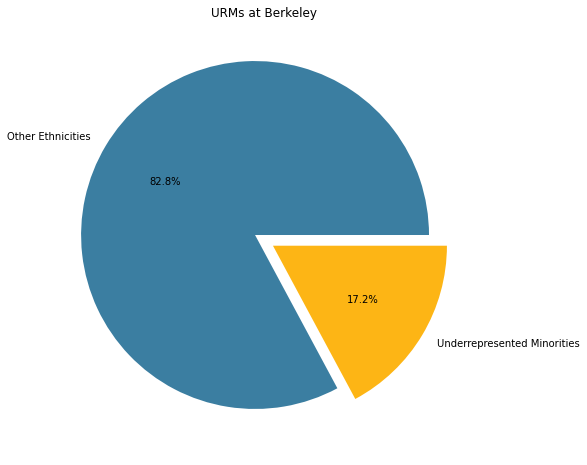

In [11]:
urms_berk = test['ppsk']

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_berk, labels = urms_berk.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=blue_gold)
plt.title("URMs at Berkeley")

In [64]:
berk_women_prop['ppsk'].sum()

80051

In [72]:
jacobs_women_prop['ppsk'].sum()

5391

[None]

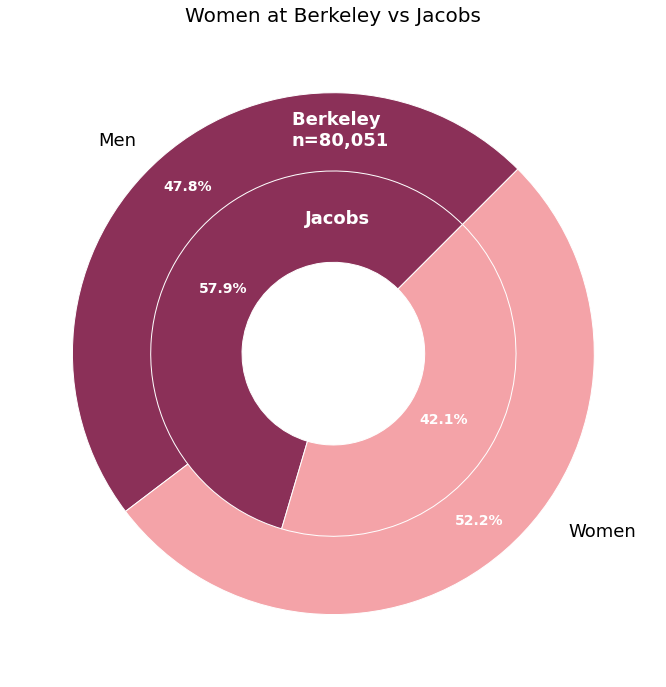

In [68]:
fig, ax = plt.subplots(figsize=(16,12))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 18
        }
size = 0.3
ax.pie(berk_women_prop['ppsk'], radius=1, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True), textprops=dict(size=14,color='white', weight='bold'), labels=urms_berk.index, autopct="%.1f%%", pctdistance=0.85, labeldistance=None, startangle=45)
ax.pie(jacobs_women_prop['ppsk'], radius=1-size, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True),textprops=dict(size=14,color='white',weight='bold'), autopct="%.1f%%", pctdistance=0.7, labeldistance=None, startangle=45)
ax.text(-.11,.5,"Jacobs", fontdict=font)
ax.text(-.16,.8,"Berkeley \nn=80,051", fontdict=font)
ax.text(-.9,.8, "Men",fontdict=dict(size=18))
ax.text(.9, -.7,"Women",fontdict=dict(size=18))
ax.set_title('Women at Berkeley vs Jacobs',fontsize=20)
ax.set(aspect="equal")

In [13]:
urms_women = urms.groupby('Gender').count().loc[[False,True,True],:].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']
urms_women

Gender
Men      5915
Women    7854
Name: ppsk, dtype: int64

Text(0.5, 1.0, 'Proportion of URM Women at Berkeley')

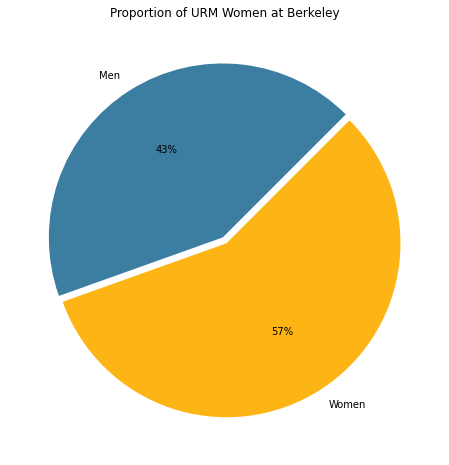

In [14]:
plt.figure(figsize = (10,8))
plt.pie(urms_women, labels=urms_women.index, colors=blue_gold, autopct="%.0f%%", explode=[0.02]*2, pctdistance=0.6, startangle=45)
plt.title("Proportion of URM Women at Berkeley")
#plt.xlabel("7 Declined to State Gender")

In [15]:
# do not run twice without resetting 'urms' variable
urms = urms.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
urms_ls = urms[urms['college'] == 'Clg of Letters & Science']

In [16]:
display(urms)
display(urms_ls)

,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


In [17]:
urms.groupby('college').count()['ppsk'].transpose()#.sort_values()

college
Clg of Chemistry                 56
Clg of Engineering              211
Clg of Environmental Design     109
Clg of Letters & Science       3005
Clg of Natural Resources        313
Haas School of Business         101
Name: ppsk, dtype: int64

In [18]:
urms.groupby('college').count()['ppsk'].sort_values()#.plot(kind='barh', figsize=(12,8), title= "URM Major Colleges in Descending Order",xlabel="").set_xlabel("Number of Students")
# exactly same order for women

college
Clg of Chemistry                 56
Haas School of Business         101
Clg of Environmental Design     109
Clg of Engineering              211
Clg of Natural Resources        313
Clg of Letters & Science       3005
Name: ppsk, dtype: int64

In [19]:
student_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
65498,651215,U,2007 Fall,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,5.4
48603,626974,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Development Studies,8.0
7565,329180,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Cognitive Science,0.0
7568,329246,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
48590,626956,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
...,...,...,...,...,...,...,...,...,...
21431,3187659,U,2020 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,NaN
21432,3187668,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
21433,3187669,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21420,3187555,U,2020 Spring,1,Clg of Letters & Science,L&S Undergrad Studies Division,UG Interdisciplinary Studies,Media Studies,NaN


In [20]:
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']

ppsk    554
Name: Underrepresented Minority, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'URMs at Jacobs')

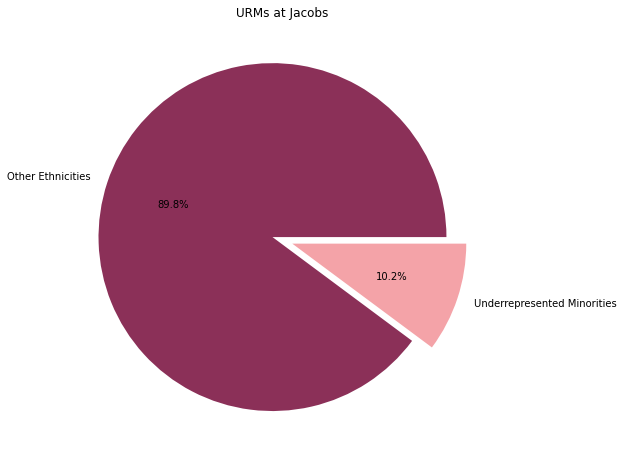

In [21]:
urms_jacobs = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[ethnicities.groupby('Ethnicity').count()[['ppsk']].loc[[True,True,False,True]].sum(),
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']])

#blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_jacobs, labels = urms_jacobs.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=jacobs_two)
plt.title("URMs at Jacobs")

In [22]:
urms_jacobs

,ppsk
Other Ethnicities,4891
Underrepresented Minorities,554


In [23]:
urms_jacobs.sum() # 380 students missing!

ppsk    5445
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


[None]

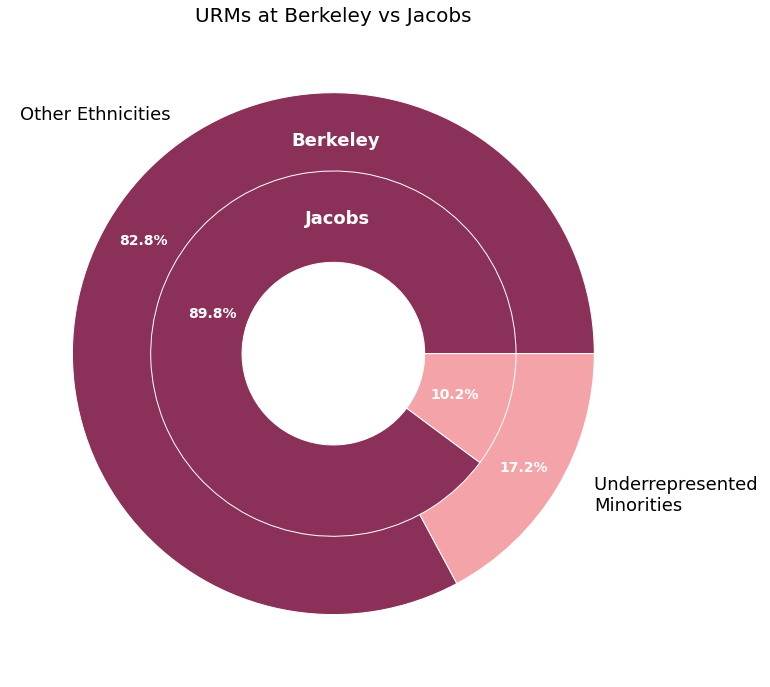

In [24]:
fig, ax = plt.subplots(figsize=(16,12))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 18
        }
size = 0.3
ax.pie(urms_berk, radius=1, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True), textprops=dict(size=14,color='white', weight='bold'), labels=urms_berk.index, autopct="%.1f%%", pctdistance=0.85, labeldistance=None)
ax.pie(urms_jacobs, radius=1-size, colors=jacobs_two,
       wedgeprops=dict(width=.35, edgecolor='w',antialiased=True),textprops=dict(size=14,color='white',weight='bold'), autopct="%.1f%%", pctdistance=0.7, labeldistance=None)
ax.text(-.11,.5,"Jacobs", fontdict=font)
ax.text(-.16,.8,"Berkeley", fontdict=font)
ax.text(-1.2,.9, "Other Ethnicities",fontdict=dict(size=18))
ax.text(1, -.6,"Underrepresented \nMinorities",fontdict=dict(size=18))
ax.set_title('URMs at Berkeley vs Jacobs',fontsize=20)
ax.set(aspect="equal")

In [25]:
women_jacobs = ethnicities.groupby(['Ethnicity','Gender']).count()[['ppsk']].loc['Underrepresented Minority'].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']

In [26]:
women_jacobs.sum()

554

In [27]:
women_jacobs

Gender
Men      315
Women    239
Name: ppsk, dtype: int64

In [28]:
urms_women

Gender
Men      5915
Women    7854
Name: ppsk, dtype: int64

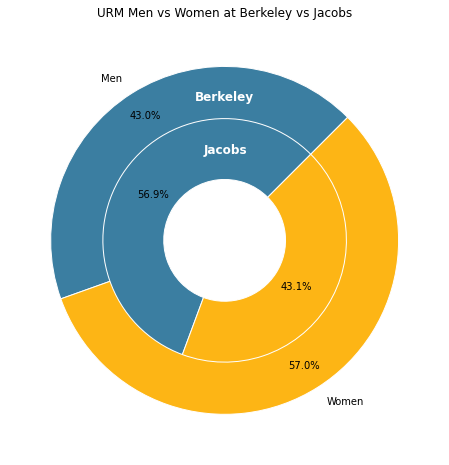

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12
        }
size = 0.3
ax.pie(urms_women, radius=1.0, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), labels=urms_women.index, autopct="%.1f%%", pctdistance=.85, startangle=45)

ax.pie(women_jacobs, radius=1-size, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), autopct="%.1f%%", pctdistance=0.7, startangle=45)
'''ax.text(.35,.2,"Jacobs", fontdict=font)
ax.text(.5,.5,"Berkeley", fontdict=font)'''
ax.text(-.12,.5,"Jacobs", fontdict=font)
ax.text(-.17,.8,"Berkeley", fontdict=font)
ax.set(aspect="equal", title='URM Men vs Women at Berkeley vs Jacobs')
plt.show()

In [30]:
jacobs_incomes = cleaned_jacobs[cleaned_jacobs['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)
jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,income.student
0,781707,2015,Fall,N,N,Y,18000.0,0.0
2,895798,2015,Fall,N,N,Y,0.0,22000.0
7,857674,2015,Fall,N,N,Y,150000.0,0.0
8,856881,2015,Fall,N,Y,Y,180000.0,0.0
9,946962,2015,Fall,N,Y,Y,97436.0,0.0
...,...,...,...,...,...,...,...,...
7927,2734942,2020,Fall,N,N,Y,160000.0,0.0
7928,2736241,2020,Fall,N,Y,N,75000.0,0.0
7929,2738497,2020,Fall,N,Y,N,750000.0,0.0
7930,2743294,2020,Fall,N,Y,N,15000.0,0.0


## Variable 'ethnicities' created by merging cleaned Jacobs data with gender and ethnicity from 'stem_paths'

Text(0.5, 0, 'Number of Students; n = 183')

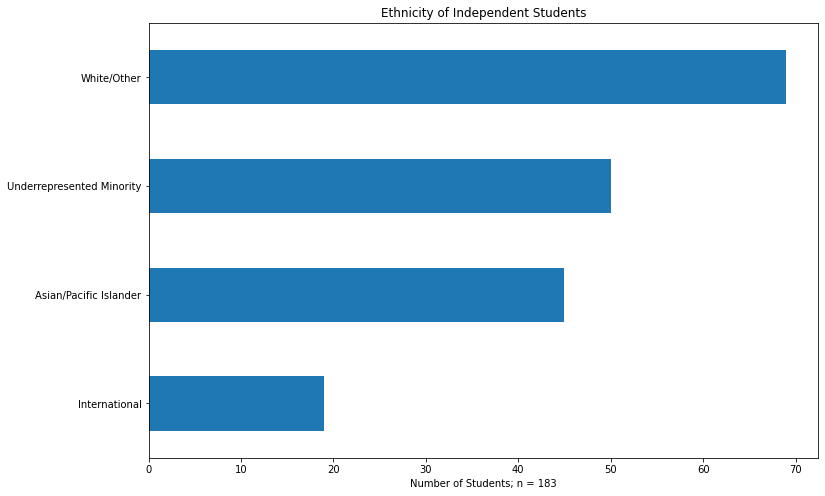

In [31]:
jacobs_incomes = ethnicities[ethnicities['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ethnic.l1','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)#.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('ethnic.l1').count()['ppsk'].sort_values().plot(kind='barh', figsize=(12,8), xlabel="", title= "Ethnicity of Independent Students").set_xlabel("Number of Students; n = 183")

In [32]:
indep_jacobs = jacobs_incomes[jacobs_incomes['income.student'] != 0]

In [33]:
all_jacobs_incomes = cleaned_jacobs[cleaned_jacobs['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)
all_jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,income.student
0,781707,2015,Fall,N,N,Y,18000.0,0.0
2,895798,2015,Fall,N,N,Y,0.0,22000.0
7,857674,2015,Fall,N,N,Y,150000.0,0.0
8,856881,2015,Fall,N,Y,Y,180000.0,0.0
9,946962,2015,Fall,N,Y,Y,97436.0,0.0
...,...,...,...,...,...,...,...,...
7927,2734942,2020,Fall,N,N,Y,160000.0,0.0
7928,2736241,2020,Fall,N,Y,N,75000.0,0.0
7929,2738497,2020,Fall,N,Y,N,750000.0,0.0
7930,2743294,2020,Fall,N,Y,N,15000.0,0.0


In [34]:
incomes_berkeley = student_courses[student_courses['undergrad.status'] == 'Undergraduate'].drop_duplicates(subset='ppsk')
incomes_berkeley = incomes_berkeley[incomes_berkeley['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ethnic.l1','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)
incomes_berkeley['Income'] = incomes_berkeley['income.parent'] + incomes_berkeley['income.student']
incomes_berkeley

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent,income.student,ethnic.l1,Income
0,2007 Summer,680817,Undergraduate,Music,Music,26AC,Primary,2,64620,64620.0,American Culture,Bonnie Wade; Rebecca Bodenheimer; Shalini Ayya...,A,Letter Grade,A+,4.0,4.0,500000.0,0.0,White/Other,500000.0
1,2007 Summer,692430,Undergraduate,Psychology,Psychology,160,Primary,1,75390,75390.0,Social Psychology,Sara Gorchoff; Stephen Hinshaw,A,Letter Grade,A+,4.0,3.0,33000.0,0.0,Asian/Pacific Islander,33000.0
2,2007 Summer,728540,Undergraduate,Ethnic Studies,Ethnic Studies,122AC,Primary,1,45230,45230.0,Eth/Race In Am Film,Diane Pearson,A,Letter Grade,A+,4.0,4.0,0.0,33000.0,White/Other,33000.0
3,2007 Summer,732318,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,20180,20180.0,Intro To Finance,Avinash Verma,A,Letter Grade,A+,4.0,4.0,100000.0,0.0,International,100000.0
4,2007 Summer,732448,Undergraduate,Economics,Economics,140,Primary,1,33515,33515.0,Econometrics,Ricardo Cavazos-Cepeda,A,Letter Grade,A+,4.0,4.0,15000.0,0.0,Asian/Pacific Islander,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67735,2018 Fall,2423817,Undergraduate,Anthropology,Anthropology,107,Primary,1,20477,20477.0,Evol Hum Brain,0,C,Letter Grade,C,2.0,4.0,22454.0,0.0,White/Other,22454.0
67736,2018 Fall,2632260,Undergraduate,Education,Education,140AC,Primary,3,28512,28512.0,Art Of Making Mean,0,A,Letter Grade,A,4.0,4.0,600000.0,0.0,White/Other,600000.0
67737,2018 Fall,2763201,Undergraduate,English,English,45A,Primary,1,21275,21275.0,Lit In English,0,A,Letter Grade,A-,3.7,4.0,35000.0,0.0,Asian/Pacific Islander,35000.0
67738,2019 Fall,2428229,Undergraduate,East Asian Lang & Culture,Japanese,1A,Primary,2,22247,22247.0,Elementary Japanese,0,A,Letter Grade,A,4.0,5.0,10000.0,0.0,Underrepresented Minority,10000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'Proportion of Independent Students at Berkeley; n = 183')

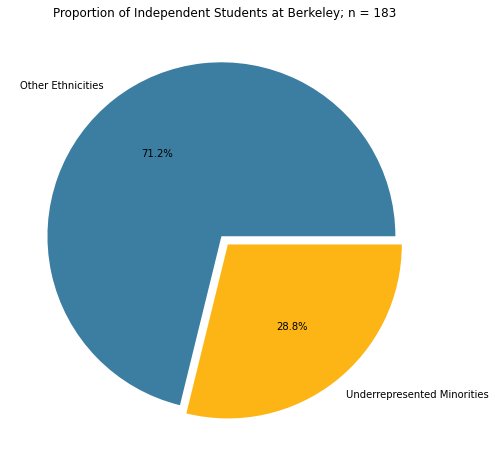

In [35]:
indep_students_berkeley = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[incomes_berkeley[incomes_berkeley['income.student'] != 0].groupby('ethnic.l1').count()[['ppsk']].loc[[True,True,False,True]].sum(),
incomes_berkeley[incomes_berkeley['income.student'] != 0].groupby('ethnic.l1').count()[['ppsk']].loc['Underrepresented Minority']])

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (12,8))
plt.pie(indep_students_berkeley, labels = indep_students_berkeley.index, autopct="%.1f%%", explode=[0.03]*2, pctdistance=0.6, colors=blue_gold)
plt.title("Proportion of Independent Students at Berkeley; n = 183")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Proportion of Independent Students at Jacobs; n = 183')

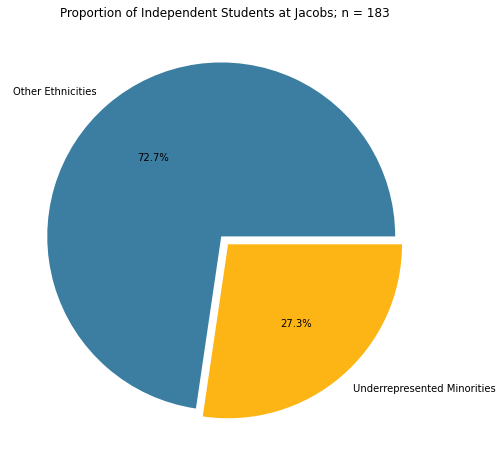

In [36]:
indep_students = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('Ethnicity').count()[['ppsk']].loc[[True,True,False,True]].sum(),
jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']])

plt.figure(figsize = (12,8))
plt.pie(indep_students, labels = indep_students.index, autopct="%.1f%%", explode=[0.03]*2, pctdistance=0.6, colors=blue_gold)
plt.title("Proportion of Independent Students at Jacobs; n = 183")

In [37]:
waivers = waivers.loc[waivers['ppsk'] != 'MISSING']
waivers['ppsk'] = waivers.loc[:,'ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
jacobs_incomes[(jacobs_incomes['Ethnicity'] == 'Underrepresented Minority') & (jacobs_incomes['income.student'] != 0)]#.groupby('income.student').agg()

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l1
42,1313676,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,12000.0,Underrepresented Minority
292,1309075,2015,Fall,N,N,Y,Underrepresented Minority,Male,0.0,20000.0,Underrepresented Minority
300,1318356,2015,Fall,N,Y,Y,Underrepresented Minority,Male,0.0,5000.0,Underrepresented Minority
577,2425148,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,27000.0,Underrepresented Minority
1018,1486891,2016,Spring,N,Y,N,Underrepresented Minority,Female,0.0,7200.0,Underrepresented Minority
1029,1487348,2016,Spring,N,Y,N,Underrepresented Minority,Male,0.0,4000.0,Underrepresented Minority
1034,2424278,2016,Spring,N,Y,Y,Underrepresented Minority,Male,0.0,9000.0,Underrepresented Minority
1174,2427246,2016,Spring,N,Y,Y,Underrepresented Minority,Male,0.0,12687.0,Underrepresented Minority
1200,2428250,2016,Spring,Y,Y,N,Underrepresented Minority,Female,0.0,16000.0,Underrepresented Minority
1217,2636386,2016,Spring,Y,Y,N,Underrepresented Minority,Male,0.0,10695.0,Underrepresented Minority


In [39]:
urm_jacobs_incomes = jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority'].merge(student_majors[['college','ppsk']], on='ppsk',how='left').drop_duplicates()
filler = urm_jacobs_incomes[urm_jacobs_incomes['college'].isna()].merge(stem_paths[['major.intended.college','ppsk']], on ='ppsk')
test =urm_jacobs_incomes.merge(filler[['ppsk','major.intended.college']], on='ppsk', how='left')

test['college'].fillna(value = test['major.intended.college'],inplace = True)

In [40]:
test

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l1,college,major.intended.college
0,1029831,2015,Fall,N,Y,N,Underrepresented Minority,Female,100000.0,0.0,Underrepresented Minority,Clg of Letters & Science,Clg of Letters & Science
1,1033557,2015,Fall,N,Y,N,Underrepresented Minority,Male,20276.0,0.0,Underrepresented Minority,Clg of Natural Resources,Clg of Natural Resources
2,1313676,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,12000.0,Underrepresented Minority,Clg of Engineering,Clg of Engineering
3,1487078,2015,Fall,N,Y,N,Underrepresented Minority,Male,100000.0,0.0,Underrepresented Minority,Clg of Letters & Science,Clg of Letters & Science
4,1306876,2015,Fall,N,Y,N,Underrepresented Minority,Male,400000.0,0.0,Underrepresented Minority,Clg of Letters & Science,Clg of Letters & Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2741723,2020,Spring,Y,Y,N,Underrepresented Minority,Male,16000.0,0.0,Underrepresented Minority,Clg of Letters & Science,NaN
533,2744968,2020,Spring,N,N,Y,Underrepresented Minority,Female,30000.0,0.0,Underrepresented Minority,Clg of Letters & Science,NaN
534,2772410,2020,Spring,N,N,Y,Underrepresented Minority,Male,11448.0,0.0,Underrepresented Minority,Clg of Letters & Science,NaN
535,1482699,2020,Fall,N,Y,N,Underrepresented Minority,Male,72000.0,0.0,Underrepresented Minority,Clg of Letters & Science,Clg of Letters & Science


In [41]:
temporary = ethnicities.merge(student_majors[['college','ppsk']], on ='ppsk', how='left').drop_duplicates()
new_filler = temporary[temporary['college'].isna()].merge(stem_paths[['major.intended.college','ppsk']], on ='ppsk')
new_test = temporary.merge(new_filler[['ppsk','major.intended.college']], on='ppsk', how='left')

new_test['college'].fillna(value = new_test['major.intended.college'],inplace = True)

In [42]:
full_graph = new_test[new_test['Ethnicity'] == 'Underrepresented Minority'].groupby('college').count()['ppsk']
full_graph

college
Clg of Chemistry                10
Clg of Engineering             169
Clg of Environmental Design     52
Clg of Letters & Science       301
Clg of Natural Resources        25
Haas School of Business         12
Name: ppsk, dtype: int64

In [43]:
len(test[test['income.student'] != 0])

50

In [44]:
temporary = ethnicities.merge(student_majors[['college','ppsk']], on ='ppsk', how='left').drop_duplicates()
temporary

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,college
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male,NaN
1,895798,2015,Fall,N,N,Y,White/Other,Male,NaN
2,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female,NaN
3,856881,2015,Fall,N,Y,Y,International,Male,NaN
4,946962,2015,Fall,N,Y,Y,White/Other,Male,NaN
...,...,...,...,...,...,...,...,...,...
13297,2734942,2020,Fall,N,N,Y,White/Other,Female,Clg of Letters & Science
13302,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female,Clg of Letters & Science
13307,2738497,2020,Fall,N,Y,N,International,Male,Clg of Letters & Science
13315,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male,Clg of Letters & Science


In [45]:
graphing_more = test[test['income.student'] != 0].groupby('college').count()['ppsk']

Text(0.5, 1.0, 'Colleges of Independent URM Students at Jacobs; n = 50')

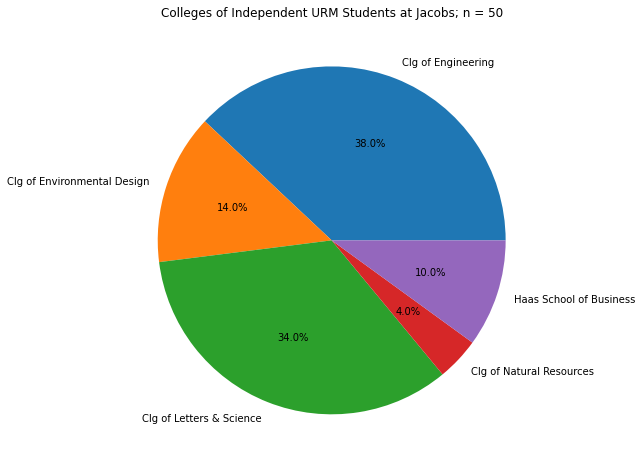

In [46]:
plt.figure(figsize = (12,8))
plt.pie(graphing_more, labels = graphing_more.index, autopct="%.1f%%", explode=[0.00]*5, pctdistance=0.6)
plt.title("Colleges of Independent URM Students at Jacobs; n = 50")

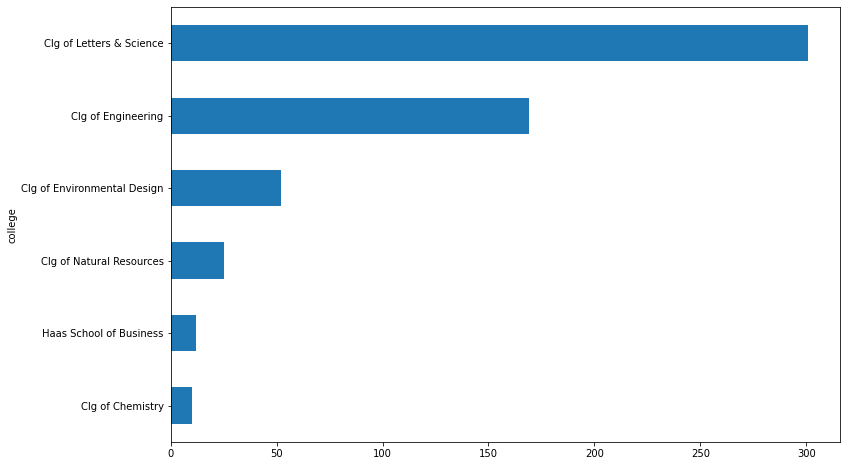

In [47]:
full_graph.sort_values().plot(kind='barh',figsize=(12,8))

Text(0.5, 1.0, 'Colleges of URM Students in Jacobs; n = 569')

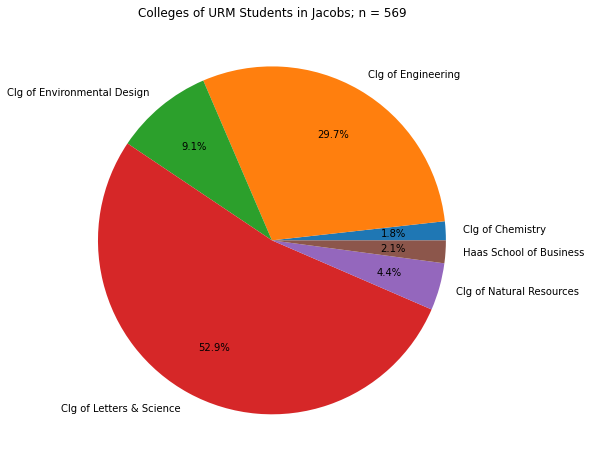

In [48]:
plt.figure(figsize = (12,8))
plt.pie(full_graph, labels = full_graph.index, autopct="%.1f%%", explode=[0.00]*6, pctdistance=0.7)
plt.title("Colleges of URM Students in Jacobs; n = 569")

Text(0.5, 0, 'Number of Students; n = 50')

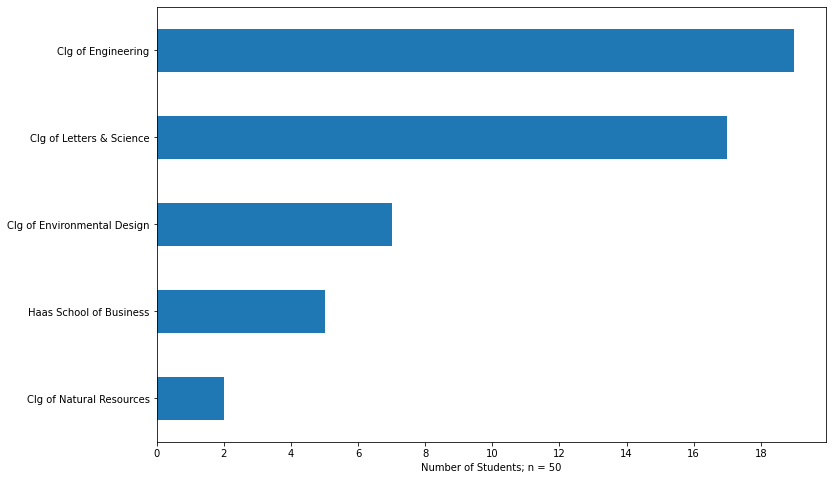

In [49]:
test[test['income.student'] != 0].groupby('college').count()['ppsk'].sort_values().plot(kind='barh',figsize=(12,8), xticks=range(0,20,2), xlabel="", title="").set_xlabel("Number of Students; n = 50")

# New Income Graphing

In [50]:
jacobs_incomes['Income'] = jacobs_incomes['income.parent'] + jacobs_incomes['income.student']

In [51]:
berkeley_incomes = incomes_berkeley[:]
top_majors = ['L&S Computer Science', 'Mechanical Engineering', 'Electrical Eng & Comp Sci', 'Cognitive Science', 'Letters & Sci Undeclared', 'Architecture']
majors = student_majors.groupby('ppsk').last().reset_index()

In [53]:
jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l1,Income
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male,18000.0,0.0,Asian/Pacific Islander,18000.0
1,895798,2015,Fall,N,N,Y,White/Other,Male,0.0,22000.0,White/Other,22000.0
2,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female,150000.0,0.0,Asian/Pacific Islander,150000.0
3,856881,2015,Fall,N,Y,Y,International,Male,180000.0,0.0,International,180000.0
4,946962,2015,Fall,N,Y,Y,White/Other,Male,97436.0,0.0,White/Other,97436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4767,2734942,2020,Fall,N,N,Y,White/Other,Female,160000.0,0.0,White/Other,160000.0
4768,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female,75000.0,0.0,Underrepresented Minority,75000.0
4769,2738497,2020,Fall,N,Y,N,International,Male,750000.0,0.0,International,750000.0
4770,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male,15000.0,0.0,Asian/Pacific Islander,15000.0


In [54]:
berkeley_incomes

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent,income.student,ethnic.l1,Income
0,2007 Summer,680817,Undergraduate,Music,Music,26AC,Primary,2,64620,64620.0,American Culture,Bonnie Wade; Rebecca Bodenheimer; Shalini Ayya...,A,Letter Grade,A+,4.0,4.0,500000.0,0.0,White/Other,500000.0
1,2007 Summer,692430,Undergraduate,Psychology,Psychology,160,Primary,1,75390,75390.0,Social Psychology,Sara Gorchoff; Stephen Hinshaw,A,Letter Grade,A+,4.0,3.0,33000.0,0.0,Asian/Pacific Islander,33000.0
2,2007 Summer,728540,Undergraduate,Ethnic Studies,Ethnic Studies,122AC,Primary,1,45230,45230.0,Eth/Race In Am Film,Diane Pearson,A,Letter Grade,A+,4.0,4.0,0.0,33000.0,White/Other,33000.0
3,2007 Summer,732318,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,20180,20180.0,Intro To Finance,Avinash Verma,A,Letter Grade,A+,4.0,4.0,100000.0,0.0,International,100000.0
4,2007 Summer,732448,Undergraduate,Economics,Economics,140,Primary,1,33515,33515.0,Econometrics,Ricardo Cavazos-Cepeda,A,Letter Grade,A+,4.0,4.0,15000.0,0.0,Asian/Pacific Islander,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67735,2018 Fall,2423817,Undergraduate,Anthropology,Anthropology,107,Primary,1,20477,20477.0,Evol Hum Brain,0,C,Letter Grade,C,2.0,4.0,22454.0,0.0,White/Other,22454.0
67736,2018 Fall,2632260,Undergraduate,Education,Education,140AC,Primary,3,28512,28512.0,Art Of Making Mean,0,A,Letter Grade,A,4.0,4.0,600000.0,0.0,White/Other,600000.0
67737,2018 Fall,2763201,Undergraduate,English,English,45A,Primary,1,21275,21275.0,Lit In English,0,A,Letter Grade,A-,3.7,4.0,35000.0,0.0,Asian/Pacific Islander,35000.0
67738,2019 Fall,2428229,Undergraduate,East Asian Lang & Culture,Japanese,1A,Primary,2,22247,22247.0,Elementary Japanese,0,A,Letter Grade,A,4.0,5.0,10000.0,0.0,Underrepresented Minority,10000.0


In [55]:
jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l1,Income
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male,18000.0,0.0,Asian/Pacific Islander,18000.0
1,895798,2015,Fall,N,N,Y,White/Other,Male,0.0,22000.0,White/Other,22000.0
2,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female,150000.0,0.0,Asian/Pacific Islander,150000.0
3,856881,2015,Fall,N,Y,Y,International,Male,180000.0,0.0,International,180000.0
4,946962,2015,Fall,N,Y,Y,White/Other,Male,97436.0,0.0,White/Other,97436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4767,2734942,2020,Fall,N,N,Y,White/Other,Female,160000.0,0.0,White/Other,160000.0
4768,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female,75000.0,0.0,Underrepresented Minority,75000.0
4769,2738497,2020,Fall,N,Y,N,International,Male,750000.0,0.0,International,750000.0
4770,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male,15000.0,0.0,Asian/Pacific Islander,15000.0


In [56]:
cleaned_bcdi = bcdi[bcdi['ppsk'] != 'MISSING']
cleaned_bcdi.dropna(inplace=True)
cleaned_bcdi['ppsk'] = cleaned_bcdi['ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority'].append(berkeley_incomes[berkeley_incomes['ethnic.l1'] == 'Underrepresented Minority']).drop_duplicates(subset='ppsk')['Income'].mean()

64318.30512336948

In [58]:
cleaned_jacobs[cleaned_jacobs['Maker Pass Holders'] == 'Y'][['ppsk', 'Maker Pass Holders']]

,ppsk,Maker Pass Holders
0,724096,Y
1,687168,Y
3,781707,Y
5,895798,Y
8,857674,Y
...,...,...
16270,4344502,Y
16277,4345646,Y
16308,4354716,Y
16329,4364634,Y


In [148]:
student_majors[student_majors['ppsk'].isin(cleaned_jacobs['ppsk'])].groupby('ppsk').last()['major'].isin(top_majors).sum()

3446

In [149]:
3446/6348

0.5428481411468179

In [141]:
student_majors.groupby('ppsk').last()

,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
ppsk,,,,,,,,
6417,U,2014 Spring,1,Clg of Letters & Science,L&S Social Sciences Division,Political Science,Political Science,0.0
6923,U,2012 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Social Welfare,L&S Social Welfare,0.0
7189,G,2007 Spring,1,Clg of Letters & Science,L&S Social Sciences Division,History,History,0.0
7780,U,2013 Summer,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,0.0
8184,G,2008 Spring,1,Haas School of Business,Haas School of Business,Business,Financial Engineering,0.0
...,...,...,...,...,...,...,...,...
4313740,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
4313741,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
4314027,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN


In [142]:
19324/65126

0.29671713294229646

In [59]:
all_incomes_berkeley = student_courses[student_courses['undergrad.status'] == 'Undergraduate'].drop_duplicates(subset='ppsk')
all_incomes_berkeley = all_incomes_berkeley[all_incomes_berkeley['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ethnic.l1','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)

all_incomes_berkeley[['income.parent','income.student']] = all_incomes_berkeley[['income.parent','income.student']].fillna(0)
all_incomes_berkeley['Income'] = all_incomes_berkeley['income.parent'] + all_incomes_berkeley['income.student']

In [60]:
all_incomes_berkeley

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent,income.student,ethnic.l1,Income
0,2007 Summer,680817,Undergraduate,Music,Music,26AC,Primary,2,64620,64620.0,American Culture,Bonnie Wade; Rebecca Bodenheimer; Shalini Ayya...,A,Letter Grade,A+,4.0,4.0,500000.0,0.0,White/Other,500000.0
1,2007 Summer,692430,Undergraduate,Psychology,Psychology,160,Primary,1,75390,75390.0,Social Psychology,Sara Gorchoff; Stephen Hinshaw,A,Letter Grade,A+,4.0,3.0,33000.0,0.0,Asian/Pacific Islander,33000.0
2,2007 Summer,728540,Undergraduate,Ethnic Studies,Ethnic Studies,122AC,Primary,1,45230,45230.0,Eth/Race In Am Film,Diane Pearson,A,Letter Grade,A+,4.0,4.0,0.0,33000.0,White/Other,33000.0
3,2007 Summer,732318,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,20180,20180.0,Intro To Finance,Avinash Verma,A,Letter Grade,A+,4.0,4.0,100000.0,0.0,International,100000.0
4,2007 Summer,732448,Undergraduate,Economics,Economics,140,Primary,1,33515,33515.0,Econometrics,Ricardo Cavazos-Cepeda,A,Letter Grade,A+,4.0,4.0,15000.0,0.0,Asian/Pacific Islander,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67735,2018 Fall,2423817,Undergraduate,Anthropology,Anthropology,107,Primary,1,20477,20477.0,Evol Hum Brain,0,C,Letter Grade,C,2.0,4.0,22454.0,0.0,White/Other,22454.0
67736,2018 Fall,2632260,Undergraduate,Education,Education,140AC,Primary,3,28512,28512.0,Art Of Making Mean,0,A,Letter Grade,A,4.0,4.0,600000.0,0.0,White/Other,600000.0
67737,2018 Fall,2763201,Undergraduate,English,English,45A,Primary,1,21275,21275.0,Lit In English,0,A,Letter Grade,A-,3.7,4.0,35000.0,0.0,Asian/Pacific Islander,35000.0
67738,2019 Fall,2428229,Undergraduate,East Asian Lang & Culture,Japanese,1A,Primary,2,22247,22247.0,Elementary Japanese,0,A,Letter Grade,A,4.0,5.0,10000.0,0.0,Underrepresented Minority,10000.0


In [84]:
len(jacobs_incomes[['ppsk','Income']].merge(waivers,on='ppsk').drop_duplicates(subset='ppsk', keep='last')['Income'])

860

In [93]:
len(jacobs_incomes[['ppsk','Income']].merge(cleaned_jacobs[cleaned_jacobs['Maker Pass Holders'] == 'Y'][['ppsk', 'Maker Pass Holders']])['Income'])

4650

In [94]:
len(all_incomes_berkeley[all_incomes_berkeley['ethnic.l1'] == 'Underrepresented Minority'].drop_duplicates(subset='ppsk')['Income'])

12726

In [95]:
len(jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority']['Income'])

522

In [96]:
len(jacobs_incomes['Income'])

4772

In [97]:
len(jacobs_incomes[['ppsk','Income']].merge(cleaned_bcdi,on='ppsk').drop_duplicates(subset='ppsk', keep='last')['Income'])

163

In [99]:
len(all_incomes_berkeley['Income'])

67738

In [108]:
incomes_by_group = pd.DataFrame(index = ['Maker Pass Waivers \nn=860', 'Maker Pass Holders \nn=4,650', 'URMs (Berkeley)\nn=12,726', 'URMs (Jacobs)\nn=522', 'Jacobs Students \nn=4,772', 'BCDI Students \nn=163', 'Berkeley Students\nn=67,738'], data = [
    # mp waivers - 860
    jacobs_incomes[['ppsk','Income']].merge(waivers,on='ppsk').drop_duplicates(subset='ppsk', keep='last')['Income'].median(),
    # mp holders - 4650
    jacobs_incomes[['ppsk','Income']].merge(cleaned_jacobs[cleaned_jacobs['Maker Pass Holders'] == 'Y'][['ppsk', 'Maker Pass Holders']])['Income'].median(),
    # urms berk - 12726
    all_incomes_berkeley[all_incomes_berkeley['ethnic.l1'] == 'Underrepresented Minority'].drop_duplicates(subset='ppsk')['Income'].median(),
    # urms jacobs - 522
    jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority']['Income'].median(),
    # jacobs - 4772
    jacobs_incomes['Income'].median(),
    # bcdi - 163
    jacobs_incomes[['ppsk','Income']].merge(cleaned_bcdi,on='ppsk').drop_duplicates(subset='ppsk', keep='last')['Income'].median(),
    #berkeley - 67738
    all_incomes_berkeley['Income'].median()
])

In [109]:
import matplotlib.ticker as ticker
from itertools import cycle, islice

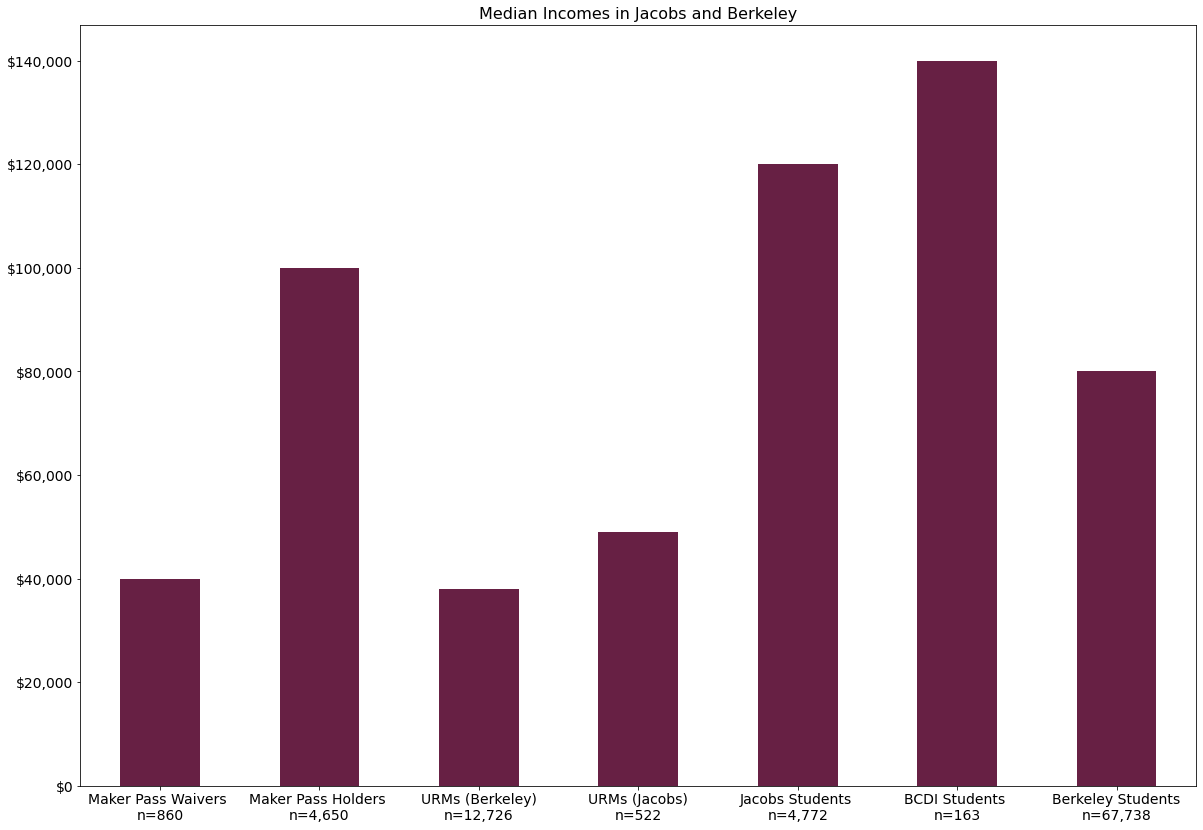

In [134]:
fig = incomes_by_group.plot(kind='bar',rot=0, figsize=(20,14), legend=False, color=[jacobs_colors[0]])

#list(islice(cycle(jacobs_colors), None, len(incomes_by_group))))
fig.set_title("Median Incomes in Jacobs and Berkeley", fontsize=16)

# thank you stack overflow
fig.set_xticklabels(fig.get_xticklabels(),fontsize=14)
fig.set_yticklabels(fig.get_yticklabels(),fontsize=14)

fig.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))